<a href="https://colab.research.google.com/github/Rivenception/CSC521_Algorithms/blob/main/Research_Project/Epoch_25_Test_FF_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# data source
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#Building the Feed-Forward Neural Network Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

all_pollution_data = pd.read_csv("/content/drive/My Drive/FFNN_Taiwain_2009_2011.csv")

#show the first 5 rows of DataFrame
all_pollution_data.head()

# Define the custom callback
class ValidationPredictionCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.validation_predictions = []
        self.validation_true = validation_data[1]  # True validation labels

    def on_epoch_end(self, epoch, logs=None):
        # Get validation data
        val_x, val_y = self.validation_data
        # Get predictions on the validation set
        val_pred = self.model.predict(val_x)
        self.validation_predictions.append(val_pred)

        # Optionally: You can print the predictions here
        # print(f"Epoch {epoch + 1} - Validation predictions: {val_pred[:5]}")  # Print first 5 predictions


# PM2.5 column only
X = all_pollution_data.drop(['PM2.5'],axis=1).values
Y = all_pollution_data[['PM2.5']].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

class PredictionCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.actual_values = []
        self.predicted_values = []
        self.training_x_values = []  # Store for training x values
        self.training_y_values = []  # Store for training y values

    def on_epoch_end(self, epoch, logs=None):
        # Get predictions for a subset of the test set
        indices = np.random.choice(len(X_test), size=5, replace=False)
        X_test_subset = X_test[indices]
        Y_test_subset = Y_test[indices]
        predictions = self.model.predict(X_test_subset, verbose=0)

        # Store actual and predicted values
        self.actual_values.extend(Y_test_subset.flatten())  # Flatten to 1D
        self.predicted_values.extend(predictions.flatten())  # Flatten to 1D

        # Print actual and predicted values for the subset (optional)
        print(f"\nEpoch {epoch + 1}:")
        for i in range(len(X_test_subset)):
            print(f"  Actual: {Y_test_subset[i][0]:.2f}, Predicted: {predictions[i][0]:.2f}")

def create_model(learning_rate, dropout_rate):
  model = Sequential()
  model.add(Input(shape=(11,)))  # Define input shape here
  #Creating a Hidden layer with 100 neurons, 11 inputs, and applying the sigmoid activation function
  model.add(Dense(25, activation='sigmoid'))
  #Dropping out a percentage of the inputs randomly during each training epoch to prevent overfitting
  model.add(Dropout(dropout_rate))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(5, activation='sigmoid'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='linear'))
  adam = Adam(learning_rate=learning_rate)
  model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
  return model

dropout_rate = 0.1
epochs = 25
learn_rate = 0.001
model = create_model(learn_rate, dropout_rate)

# Instantiate the custom callback
val_prediction_callback = ValidationPredictionCallback(validation_data=(X_test, Y_test))

prediction_callback = PredictionCallback()

model_history = model.fit(
    X_train,
    Y_train,
    batch_size= 1,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
    validation_data=(X_test, Y_test),
    callbacks=[val_prediction_callback, prediction_callback])
    # callbacks=[prediction_callback])

# Plot the true vs predicted values over epochs
validation_true = val_prediction_callback.validation_true
validation_predictions = val_prediction_callback.validation_predictions

# # Access actual and predicted values after training
actual_values = prediction_callback.actual_values
predicted_values = prediction_callback.predicted_values

# Get predictions for training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Actual Values:", actual_values)
print("Predicted Values:", predicted_values)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy with Mean Absolute Error:', score[1])

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Epoch 1:
  Actual: 11.42, Predicted: 2.33
  Actual: 26.00, Predicted: 2.34
  Actual: 9.96, Predicted: 2.34
  Actual: 35.75, Predicted: 2.34
  Actual: 14.58, Predicted: 2.34
876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 478.6377 - mae: 18.9845 - val_loss: 333.6284 - val_mae: 15.4152
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Epoch 2:
  Actual: 9.92, Predicted: 6.44
  Actual: 16.75, Predicted: 6.44
  Actual: 20.04, Predicted: 6.44
  Actual: 63.67, Predicted: 6.44
  Actual: 24.50, Predicted: 6.44
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 381.2168 - mae: 15.7229 - val_loss: 224.0542 - val_mae: 11.5469
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Epoch 3:
  Actual: 35.75, Predicted: 9.51
  Actual: 4.79, Predicted: 9.51
  Actual: 31.75, Predicted: 9.51
  Actual: 17.21, Predicted: 9.51
  Actual: 21.79, Predicted: 9.51
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 322.3190 - mae: 13.0744 - val_loss: 164.2655 - val_mae: 

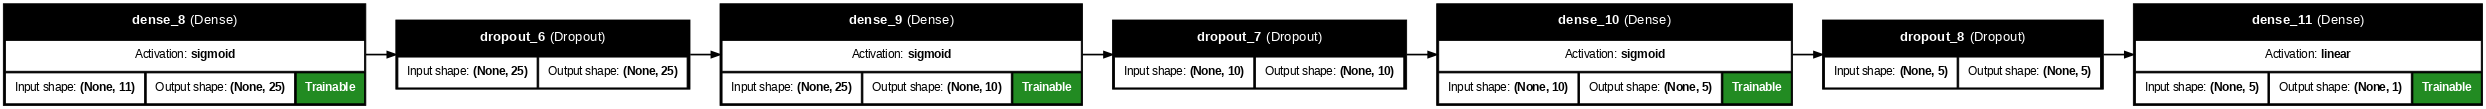

In [23]:
#Visually mapping the data shape and training actions of the Neural Network
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, \
           show_layer_activations=True, show_trainable=True, dpi=60, rankdir='LR')

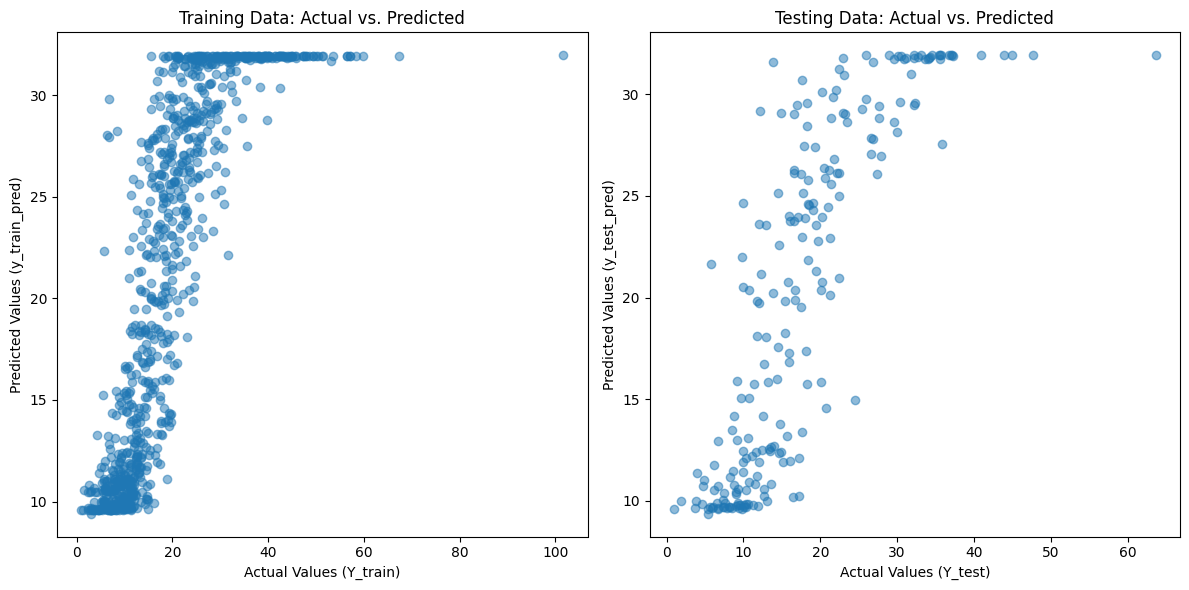

In [24]:
import matplotlib.pyplot as plt

# ... (your existing code and prediction calculation above) ...

plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(Y_train, y_train_pred, alpha=0.5)  # Actual vs. Predicted
plt.title('Training Data: Actual vs. Predicted')
plt.xlabel('Actual Values (Y_train)')
plt.ylabel('Predicted Values (y_train_pred)')

# Plot for testing data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(Y_test, y_test_pred, alpha=0.5)  # Actual vs. Predicted
plt.title('Testing Data: Actual vs. Predicted')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (y_test_pred)')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

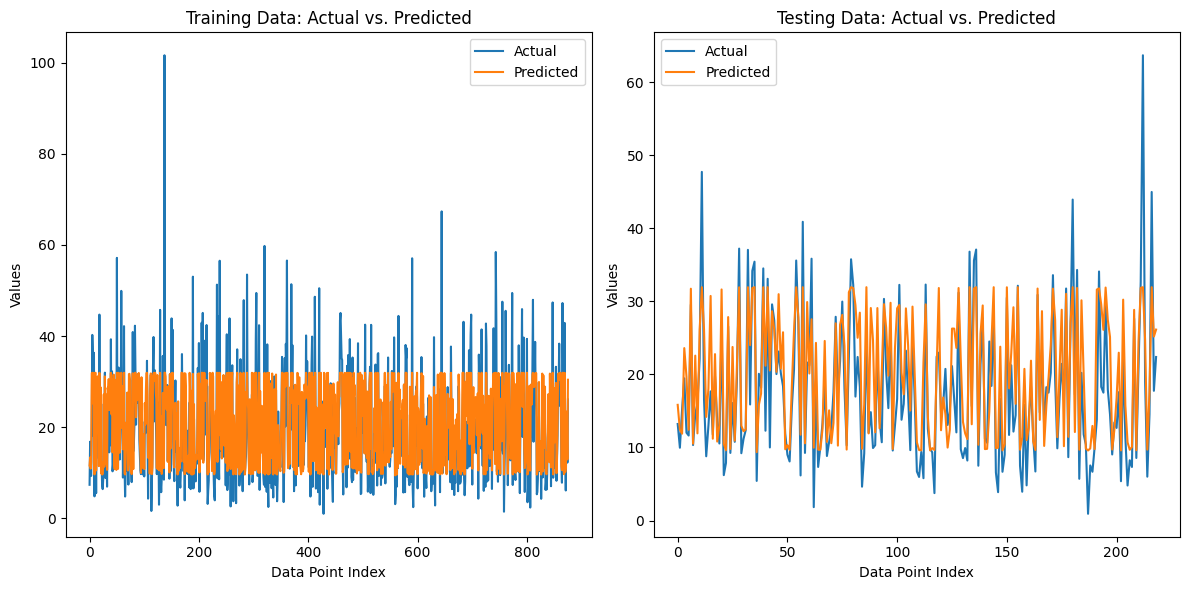

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code and prediction calculation) ...

plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot

# Generate x-axis values (indices)
x_train_indices = np.arange(len(Y_train))

# Plot actual and predicted values as lines
plt.plot(x_train_indices, Y_train, label='Actual')
plt.plot(x_train_indices, y_train_pred, label='Predicted')

plt.title('Training Data: Actual vs. Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()

# Plot for testing data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

# Generate x-axis values (indices)
x_test_indices = np.arange(len(Y_test))

# Plot actual and predicted values as lines
plt.plot(x_test_indices, Y_test, label='Actual')
plt.plot(x_test_indices, y_test_pred, label='Predicted')

plt.title('Testing Data: Actual vs. Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Text(0.5, 0, 'Epoch')

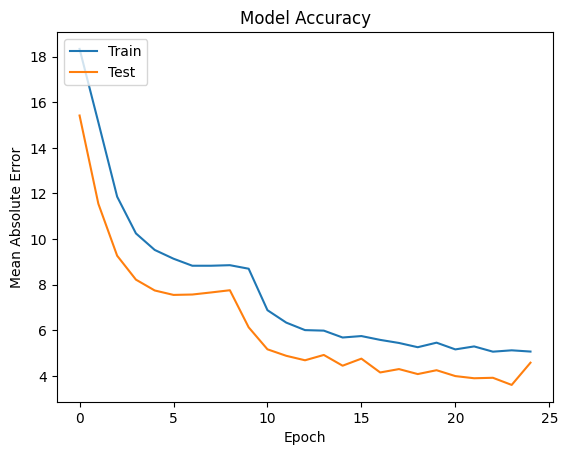

In [26]:
#Plot the model in a graph
import matplotlib.pyplot as plt

plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Model Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

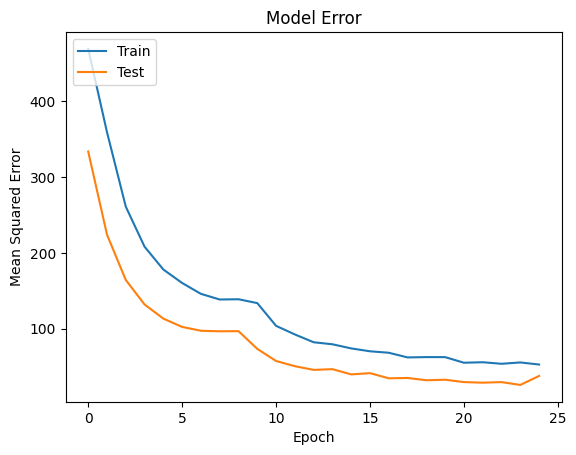

In [27]:
#Plot the model in a graph
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Model Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')

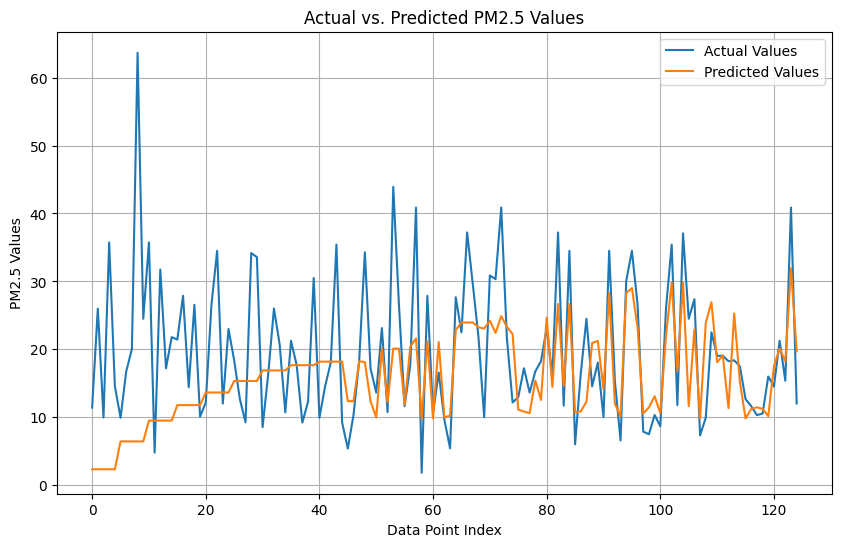

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values')
plt.plot(predicted_values, label='Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('PM2.5 Values')
plt.title('Actual vs. Predicted PM2.5 Values')
plt.legend()
plt.grid(True)
plt.show()

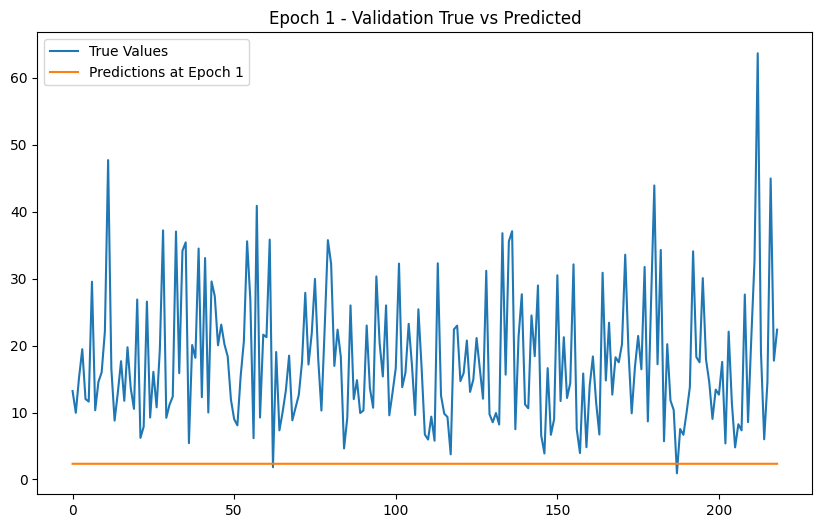

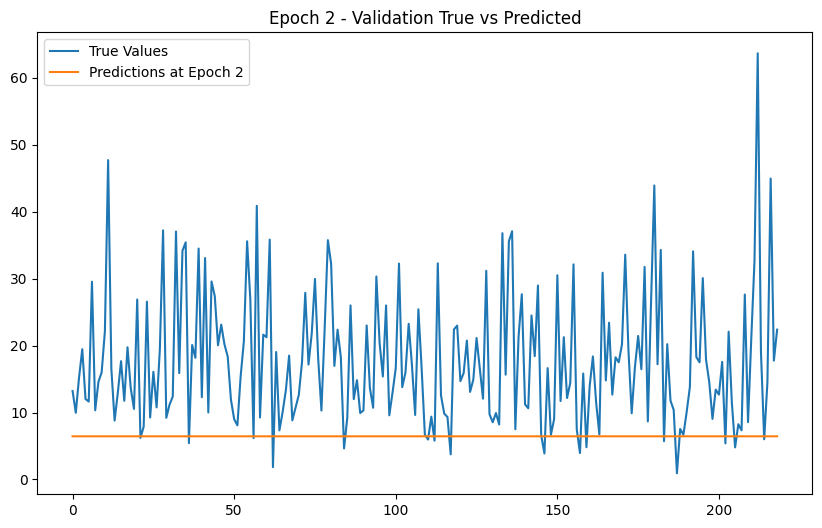

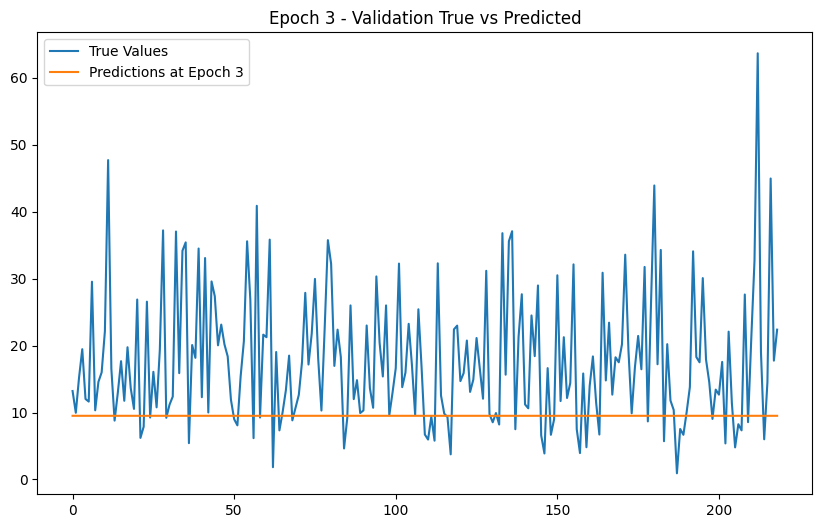

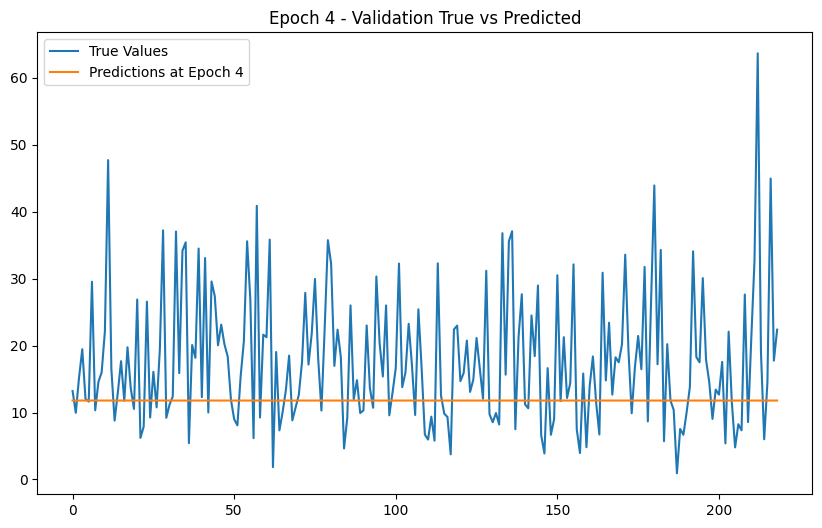

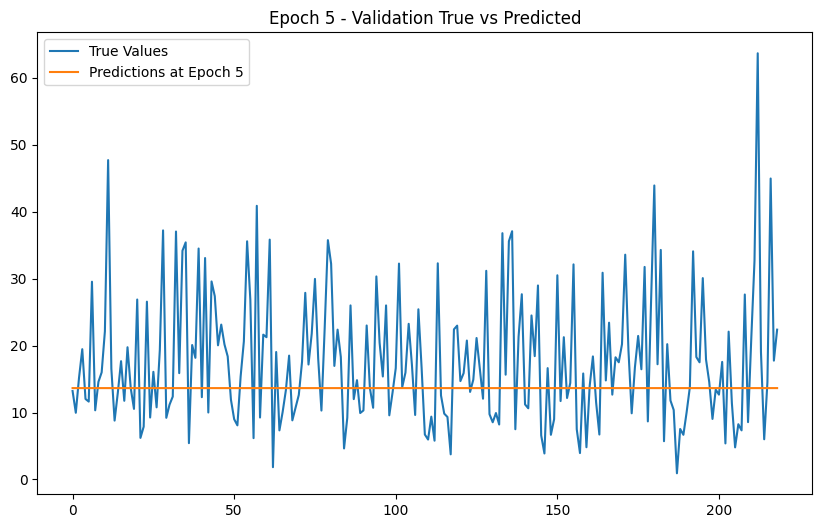

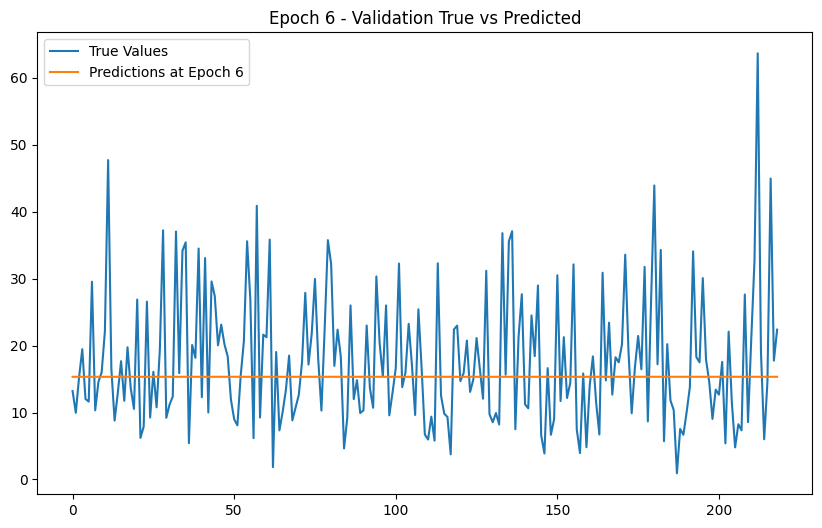

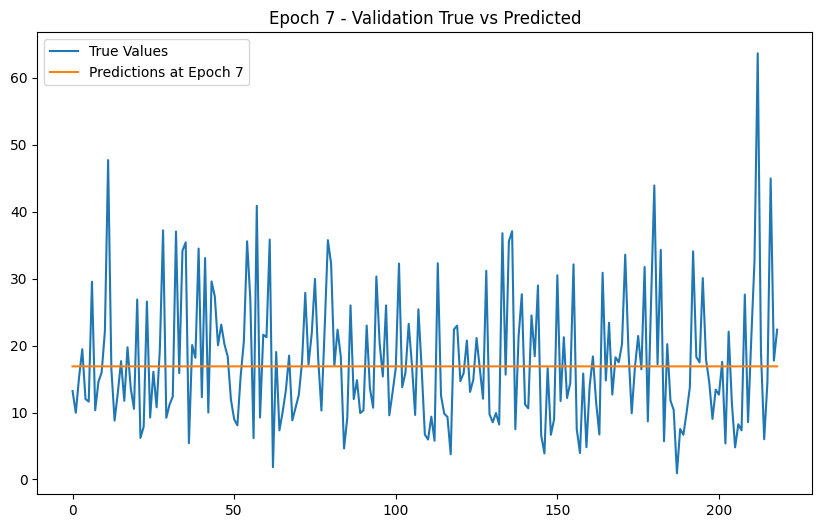

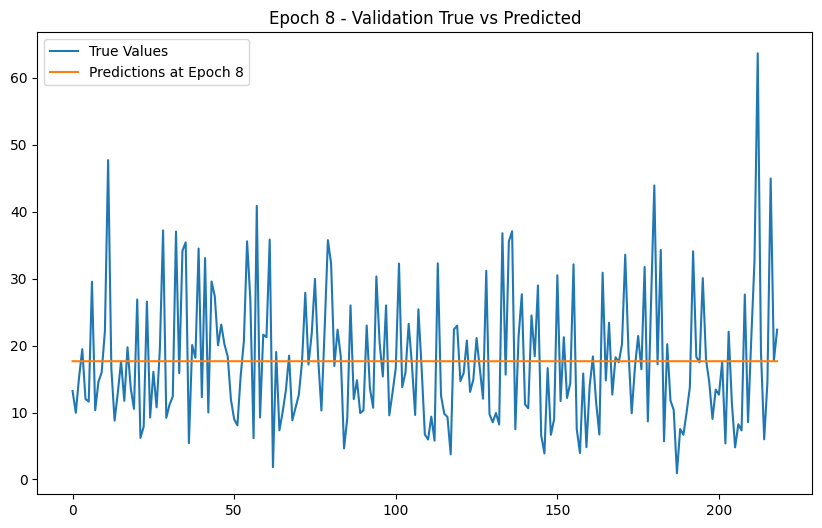

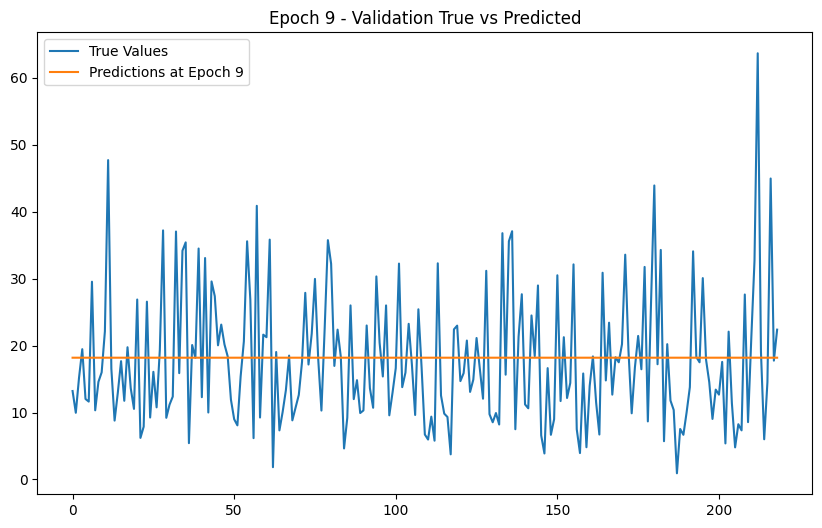

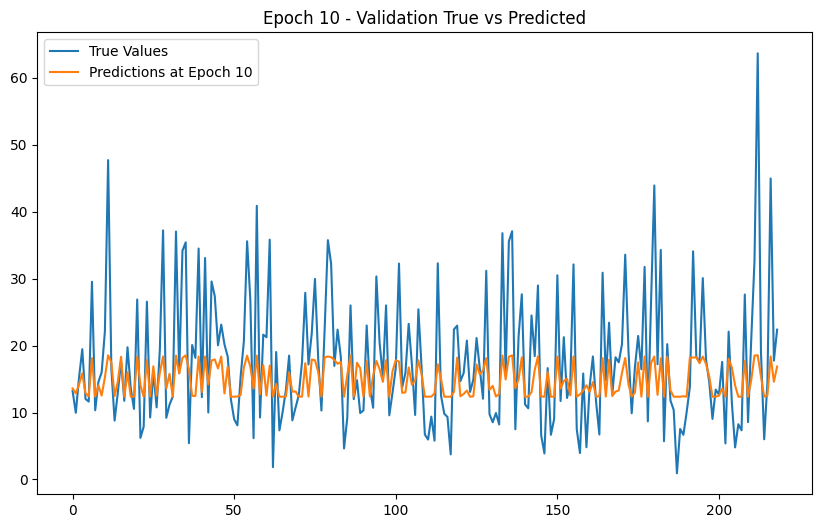

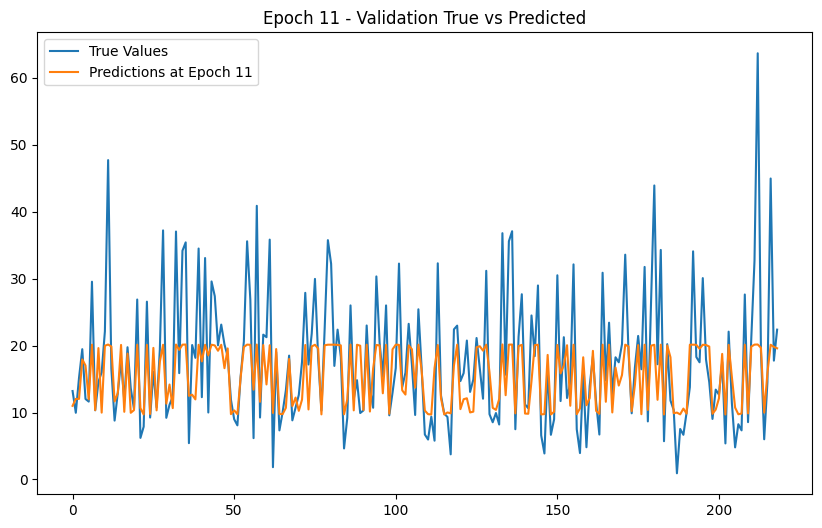

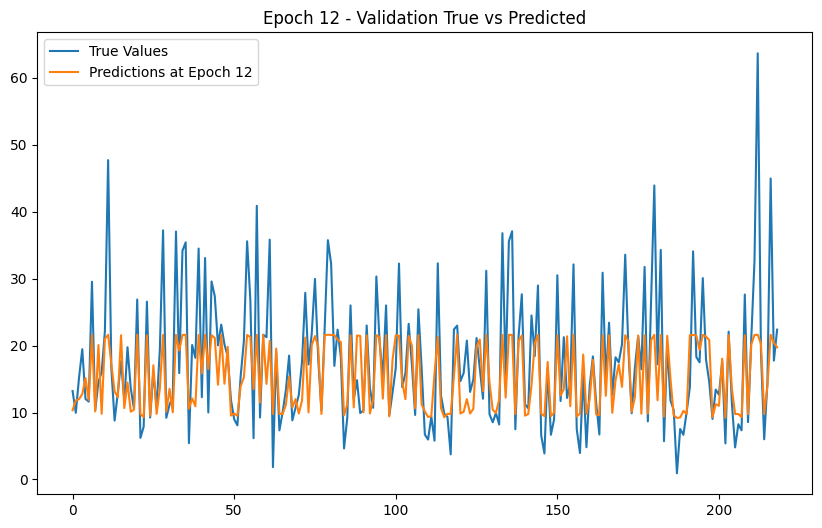

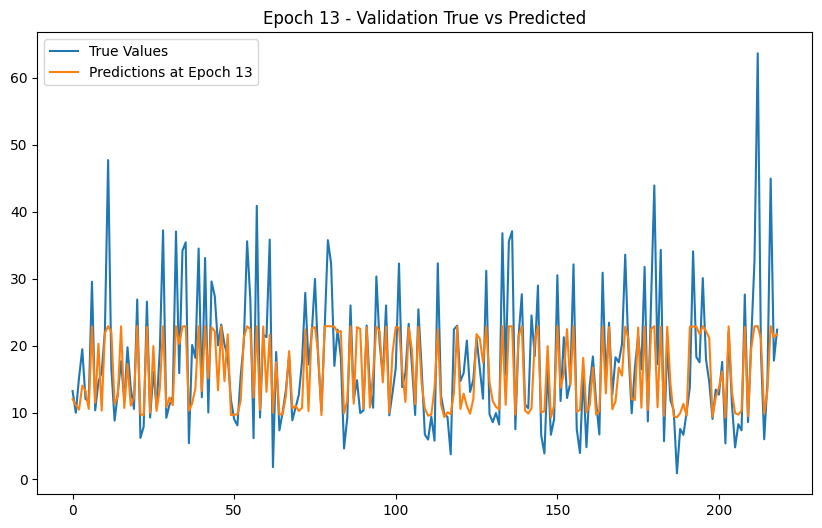

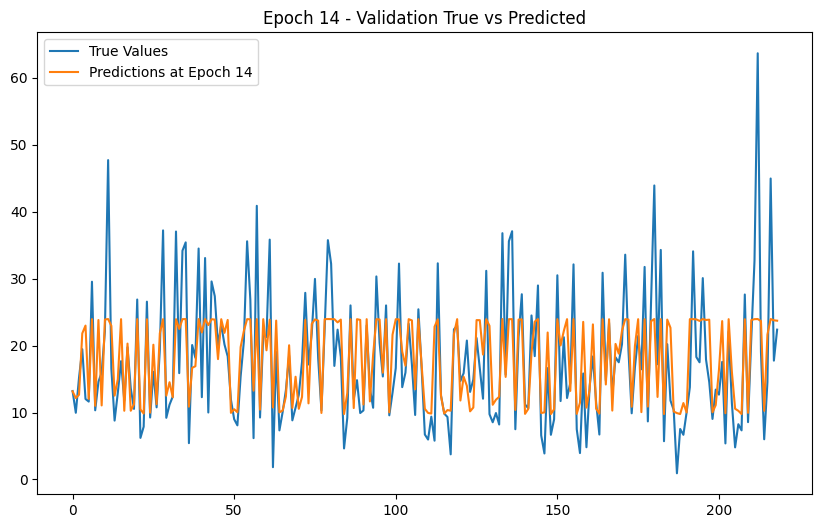

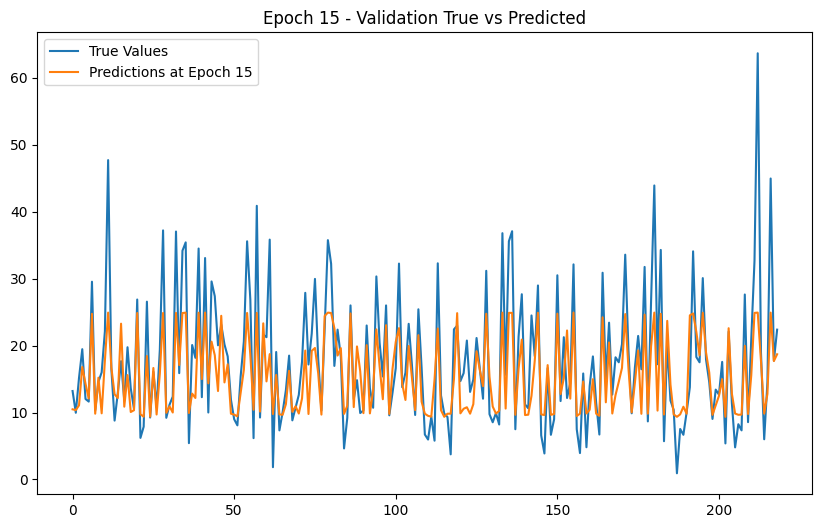

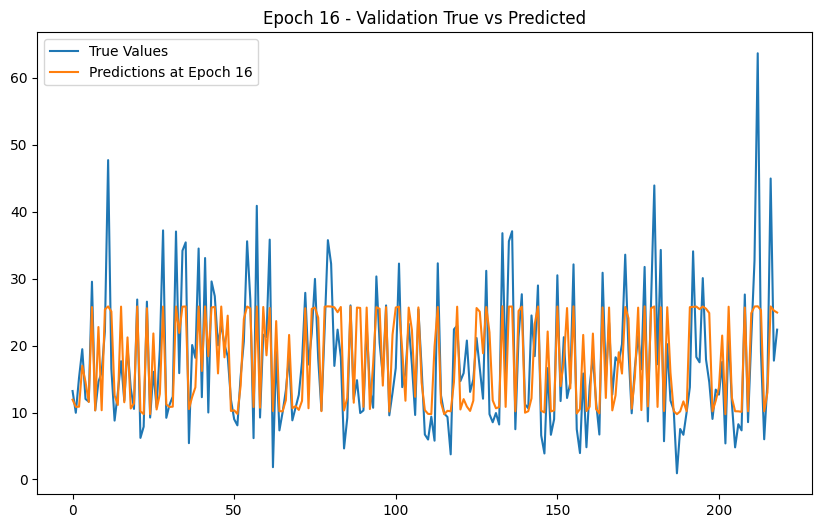

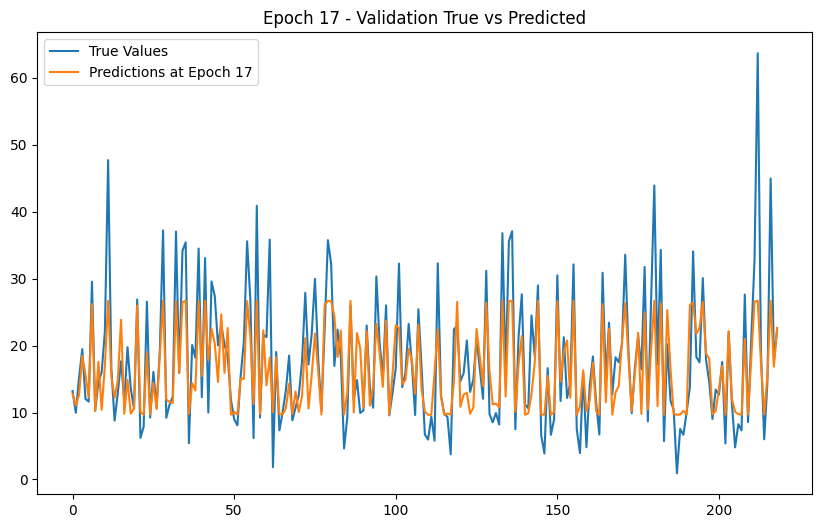

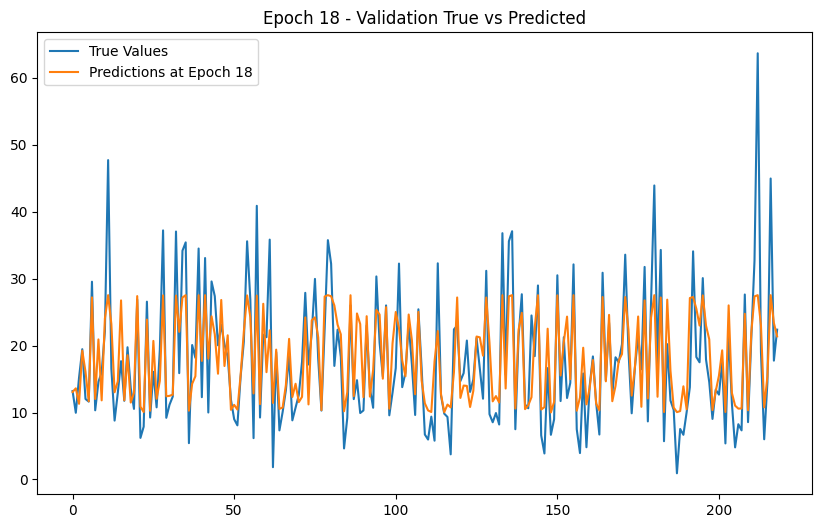

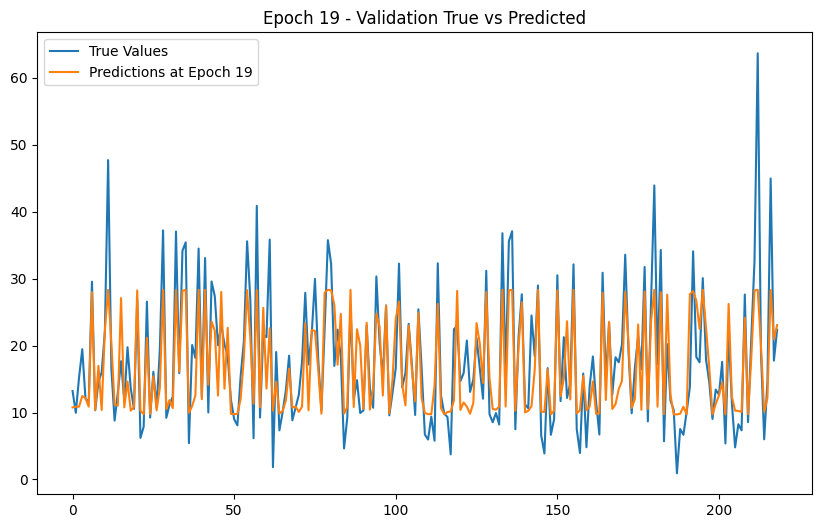

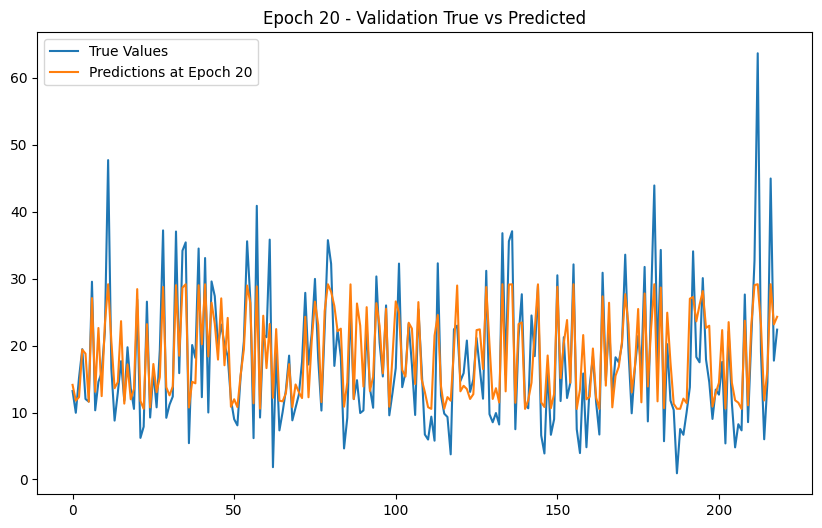

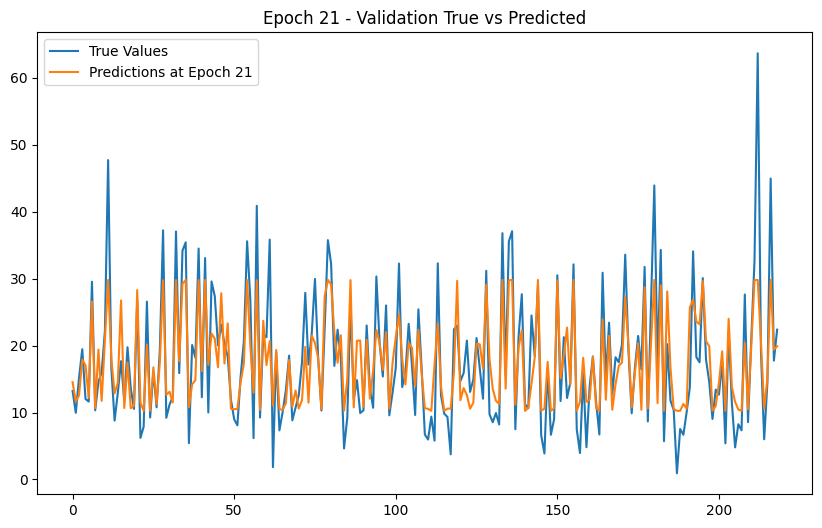

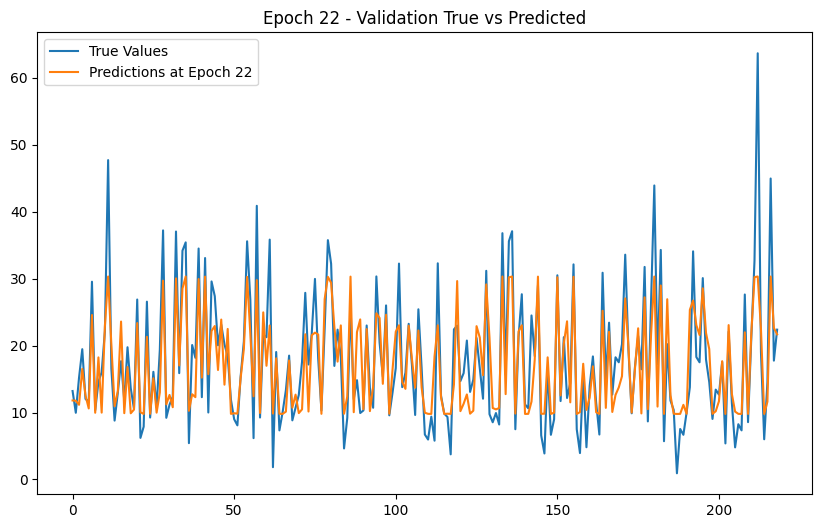

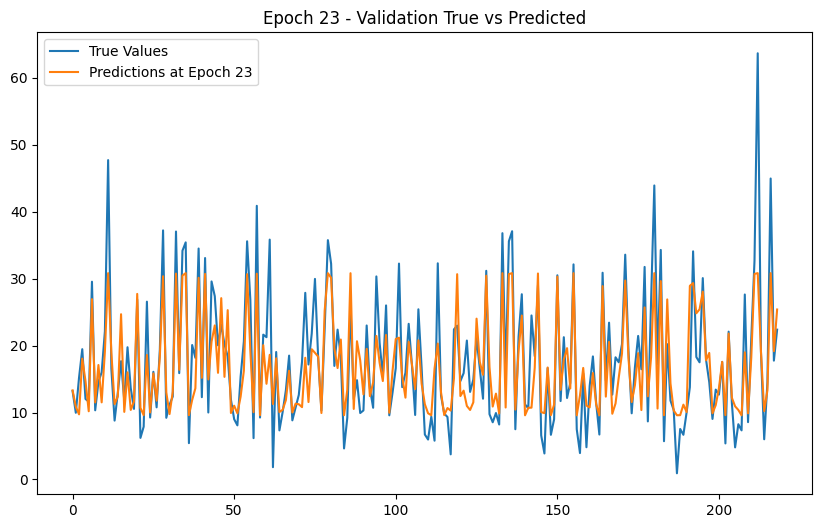

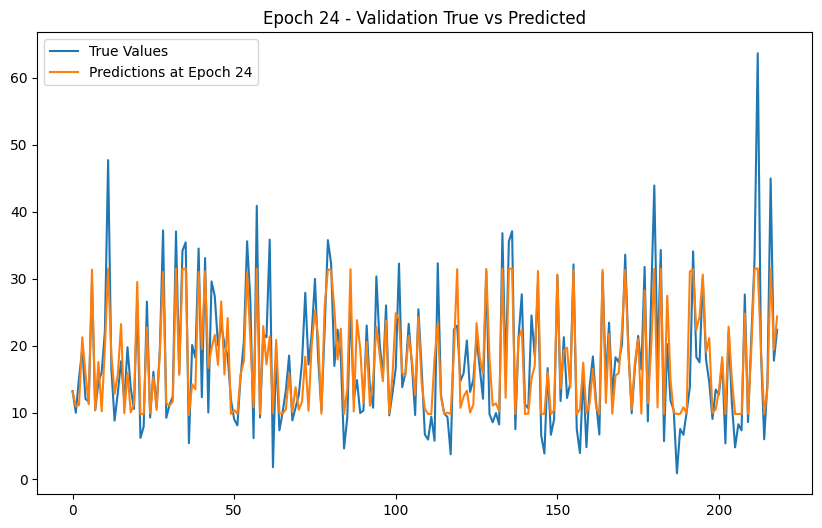

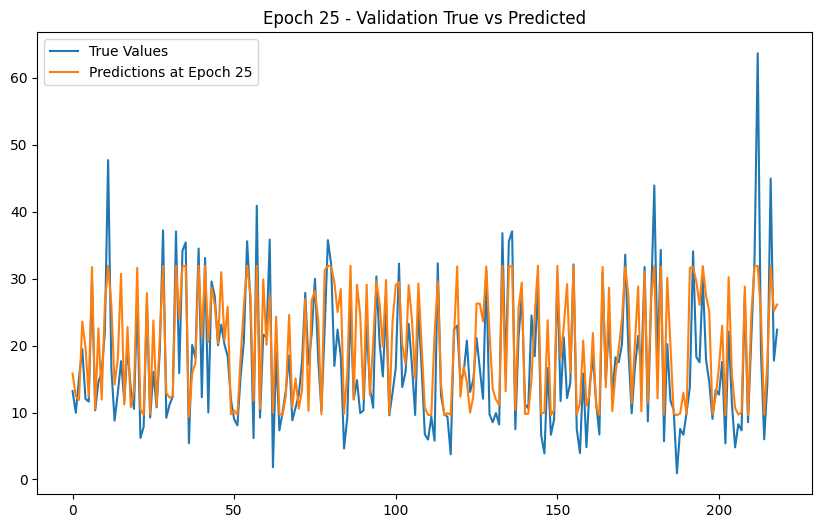

In [29]:
#Plot the model in a graph
import matplotlib.pyplot as plt

# Plot using Matplotlib
for epoch, predictions in enumerate(validation_predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(validation_true, label='True Values')
    plt.plot(predictions, label=f'Predictions at Epoch {epoch+1}')
    plt.title(f'Epoch {epoch+1} - Validation True vs Predicted')
    plt.legend()
    plt.show()

In [30]:
#Running a Prediction
X_new = ([[12.67, 0.31, 1.32, 8.38, 9.70, 33.69, 57.83, 57.45, 4.66, 272.78, 3.02]])
X_new = np.array(X_new)

prediction = model.predict(X_new)
print("The Expected Prediction Value: 30.13")
print("The PM 2.5 would be:",prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The Expected Prediction Value: 30.13
The PM 2.5 would be: [[31.864838]]
